In [161]:
using DataFrames
using YFinance
using PlotlyJS
using Plots
using Dates
using CSV


┌ Warning: Module Showoff with build ID fafbfcfd-d50a-735f-0000-0fa37e9900de is missing from the cache.
│ This may mean Showoff [992d4aef-0814-514b-bc4d-f2e9a6c4116f] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


┌ Warning: Module StatsBase with build ID fafbfcfd-618a-661b-0000-0fa39bd05439 is missing from the cache.
│ This may mean StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


┌ Warning: Module StatsBase with build ID fafbfcfd-618a-661b-0000-0fa39bd05439 is missing from the cache.
│ This may mean StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


┌ Warning: Module StatsBase with build ID fafbfcfd-618a-661b-0000-0fa39bd05439 is missing from the cache.
│ This may mean StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


┌ Warning: Module Distributions with build ID ffffffff-ffff-ffff-0002-34e9eb809f59 is missing from the cache.
│ This may mean Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


In [162]:
# Especifique o símbolo da ação que você deseja buscar
portfolio = ["PETR4.SA", "VALE3.SA"]  # Apple Inc. como exemplo

initial_date = "2010-07-01"
final_date = "2023-09-07"

"2023-09-07"

In [163]:
function get_sotck_prices(portfolio, initial_date, final_date, save="")
    df_out = DataFrame()
    for symbol in portfolio
        df_temp = get_prices(symbol,range="1d",startdt=initial_date, enddt=final_date) |> DataFrame
        df_out = vcat(df_out, df_temp)
    end
    rename!(df_out, [Symbol(titlecase(string(col))) for col in names(df_out)])
    rename!(df_out, :Timestamp => :Date_time)
    df_out.Date_time = Date.(df_out.Date_time)


    if length(save) > 0
        CSV.write("$save.csv", df_out)
        println("Saved file: $save.csv")
    end
    return df_out
end

get_sotck_prices (generic function with 2 methods)

In [164]:
# get_prices("AAPL",range="1d",startdt=initial_date, enddt=final_date) |> DataFrame
prices = get_sotck_prices(portfolio, initial_date, final_date)
first(prices, 5)

Row,Ticker,Date_time,Open,High,Low,Close,Adjclose,Vol
,String,Date,Float64,Float64,Float64,Float64,Float64,Float64
1,PETR4.SA,2010-07-01,8.15864,8.18873,7.91788,26.45,7.96002,5.60731e6
2,PETR4.SA,2010-07-02,8.04127,8.12252,7.98108,26.77,8.05632,3.03603e6
3,PETR4.SA,2010-07-05,8.05933,8.14058,7.9871,26.54,7.9871,2.07168e6
4,PETR4.SA,2010-07-06,8.12553,8.21582,8.05331,27.05,8.14058,4.78392e6
5,PETR4.SA,2010-07-07,8.18573,8.28203,8.05933,27.4,8.24591,4.98228e6


In [227]:
function filter_stock(df, stock)
    
    return filter(row -> row.Ticker==stock, df)

end


filter_stock (generic function with 1 method)

In [236]:
function interactive_chart(df, stock)

    df_temp = filter_stock(df, stock)
    PlotlyJS.plot(candlestick(x=df_temp[:, "Date_time"], 
        open=df_temp[:, "Open"],
        high=df_temp[:, "High"],
        low=df_temp[:, "Low"],
        close=df_temp[:, "Adjclose"]),
        Layout(title=stock))

end


interactive_chart (generic function with 1 method)

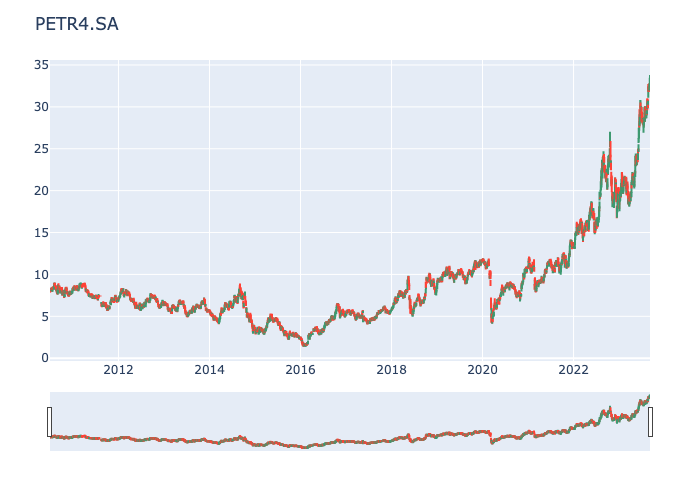

In [237]:
interactive_chart(prices, "PETR4.SA")